# Data Preprocessing and feature engineering-Phase 2

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Data Collection
## Ramen Ratings dataset
### The Ramen Ratings dataset is an introductory dataset designed for beginners to practice exploratory data analysis (EDA). It provides a variety of information about different types of Ramen noodles, including their styles, pack sizes, countries of origin, and ratings. This dataset is ideal for those looking to explore data, generate visualizations, and practice data manipulation techniques. The dataset is collected from kaggale.

### Content
### The dataset contains information on various Ramen noodles, characterized by the following attributes:
    Style: The style or type of Ramen (e.g., Cup, Pack, Bowl).
    Pack Size: The size of the Ramen pack (e.g., single, multiple packs).
    Country: The country where the Ramen is from.
    Rating: The rating of the Ramen, potentially indicating its quality or popularity.
### Columns
    Brand: The brand name of the Ramen.
    Variety: The specific variety or flavor of the Ramen.
    Style: The style of packaging (e.g., Cup, Pack, Bowl).
    Country: The country of origin.
    Stars: The rating of the Ramen (usually out of 5 stars).
    Top Ten: The year and rank if the Ramen is in the top 10 for that year.

In [2]:
data = pd.read_csv('ramen-ratings.csv')

In [3]:
data

,Review #,Brand,Variety,Style,Country,Stars,Top_Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


# Data Inspection

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top_Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB
None


In [5]:
print(data.describe())

          Review #
count  2580.000000
mean   1290.500000
std     744.926171
min       1.000000
25%     645.750000
50%    1290.500000
75%    1935.250000
max    2580.000000


In [6]:
print(data.dtypes)


Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top_Ten     object
dtype: object


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top_Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [8]:
duplicate_rows = data.duplicated()
print(f'Total duplicate rows: {duplicate_rows.sum()}')

Total duplicate rows: 0


In [9]:
 #display the duplicated rows
print(data[duplicate_rows])

Empty DataFrame
Columns: [Review #, Brand, Variety, Style, Country, Stars, Top_Ten]
Index: []


# Data Cleaning

In [10]:
data.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top_Ten     2539
dtype: int64

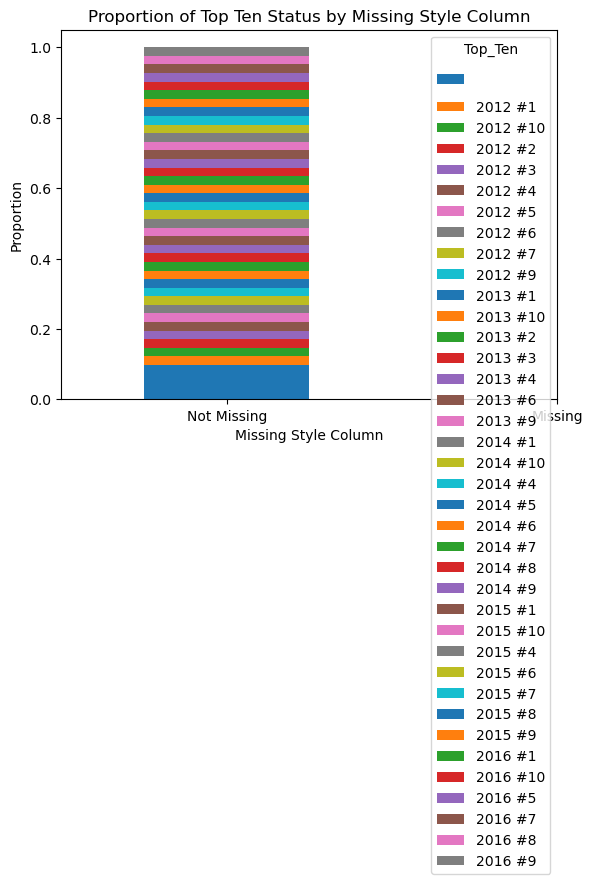

In [11]:
# Create a binary feature indicating missingness in the 'Style' column
data['Style_Missing'] = data['Style'].isna().astype(int)

# Calculate the proportion of 'Top Ten' status within each group
relationship = data.groupby('Style_Missing')['Top_Ten'].value_counts(normalize=True).unstack()

# Plot the relationship
relationship.plot(kind='bar', stacked=True)
plt.xlabel('Missing Style Column')
plt.ylabel('Proportion')
plt.title('Proportion of Top Ten Status by Missing Style Column')
plt.legend(title='Top_Ten')
plt.xticks([0, 1], ['Not Missing', 'Missing'], rotation=0)
plt.show()

In [12]:
print("Missing Values Per Column:")
print(data.isna().sum())

Missing Values Per Column:
Review #            0
Brand               0
Variety             0
Style               2
Country             0
Stars               0
Top_Ten          2539
Style_Missing       0
dtype: int64


In [13]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns

print(f"Numeric columns: {numeric_cols}")
print(f"Non-numeric columns: {non_numeric_cols}")


Numeric columns: Index(['Review #'], dtype='object')
Non-numeric columns: Index(['Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top_Ten',
       'Style_Missing'],
      dtype='object')


In [14]:

# Step 3: Impute Missing Values
# Impute numeric columns with mean
imputer_mean = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer_mean.fit_transform(data[numeric_cols])

# Impute non-numeric columns with the most frequent value
imputer_mode = SimpleImputer(strategy='most_frequent')
data[non_numeric_cols] = imputer_mode.fit_transform(data[non_numeric_cols])

# Check for remaining missing values
print("\nRemaining Missing Values Per Column After Imputation:")
print(data.isna().sum())


Remaining Missing Values Per Column After Imputation:
Review #         0
Brand            0
Variety          0
Style            0
Country          0
Stars            0
Top_Ten          0
Style_Missing    0
dtype: int64


In [15]:
#  Identify Outliers using IQR
def identify_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outliers = {col: identify_outliers(data, col) for col in numeric_cols}

# Print the number of outliers for each column
for col in numeric_cols:
    print(f'Number of outliers in {col}: {len(outliers[col])}')


Number of outliers in Review #: 0


# Feature Engineering

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, KBinsDiscretizer

categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [17]:
categorical_cols

Index(['Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top_Ten',
       'Style_Missing'],
      dtype='object')

In [18]:
# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
data_one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[categorical_cols]), 
                                    columns=one_hot_encoder.get_feature_names_out(categorical_cols))

C:\Users\91914\an\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
# Label Encoding
label_encoder = LabelEncoder()
data_label_encoded = data[categorical_cols].apply(label_encoder.fit_transform)

In [20]:
# Drop original categorical columns and concatenate encoded columns
data_encoded = data.drop(categorical_cols, axis=1)
data_encoded = pd.concat([data_encoded, data_one_hot_encoded], axis=1)

# Step 2: Create Interaction Features
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Only consider a subset for interaction to avoid huge dimensionality
selected_numeric_cols = numeric_cols[:3]  # Example: First 3 numeric columns

interaction_terms = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
data_interaction = pd.DataFrame(interaction_terms.fit_transform(data_encoded[selected_numeric_cols]),
                                columns=interaction_terms.get_feature_names_out(selected_numeric_cols))

# Concatenate interaction features with the original data
data_encoded = pd.concat([data_encoded, data_interaction], axis=1)

In [21]:
#Binning one numeric column 'Stars' into 5 bins
if 'age' in data.columns:
    binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    data_encoded['stars_binned'] = binner.fit_transform(data[['Stars']])
else:
    print("Column 'Stars' not found in the dataset")

# Check the resulting dataset
print(data_encoded.head())

# Save the processed dataset
data_encoded.to_csv('your_processed_dataset.csv', index=False)

Column 'Stars' not found in the dataset
   Review #  Brand_7 Select  Brand_7 Select/Nissin  Brand_A-One  \
0    2580.0             0.0                    0.0          0.0   
1    2579.0             0.0                    0.0          0.0   
2    2578.0             0.0                    0.0          0.0   
3    2577.0             0.0                    0.0          0.0   
4    2576.0             0.0                    0.0          0.0   

   Brand_A-Sha Dry Noodle  Brand_A1  Brand_ABC  Brand_Acecook  Brand_Adabi  \
0                     0.0       0.0        0.0            0.0          0.0   
1                     0.0       0.0        0.0            0.0          0.0   
2                     0.0       0.0        0.0            0.0          0.0   
3                     0.0       0.0        0.0            0.0          0.0   
4                     0.0       0.0        0.0            0.0          0.0   

   Brand_Ah Lai  ...  Top_Ten_2015 #8  Top_Ten_2015 #9  Top_Ten_2016 #1  \
0           0

# Data Transformation

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
scaler_minmax = MinMaxScaler()
data_scaled_minmax = scaler_minmax.fit_transform(data[numeric_cols])
data_scaled_minmax = pd.DataFrame(data_scaled_minmax, columns=numeric_cols)

In [23]:
scaler_standard = StandardScaler()
data_scaled_standard = scaler_standard.fit_transform(data[numeric_cols])
data_scaled_standard = pd.DataFrame(data_scaled_standard, columns=numeric_cols)

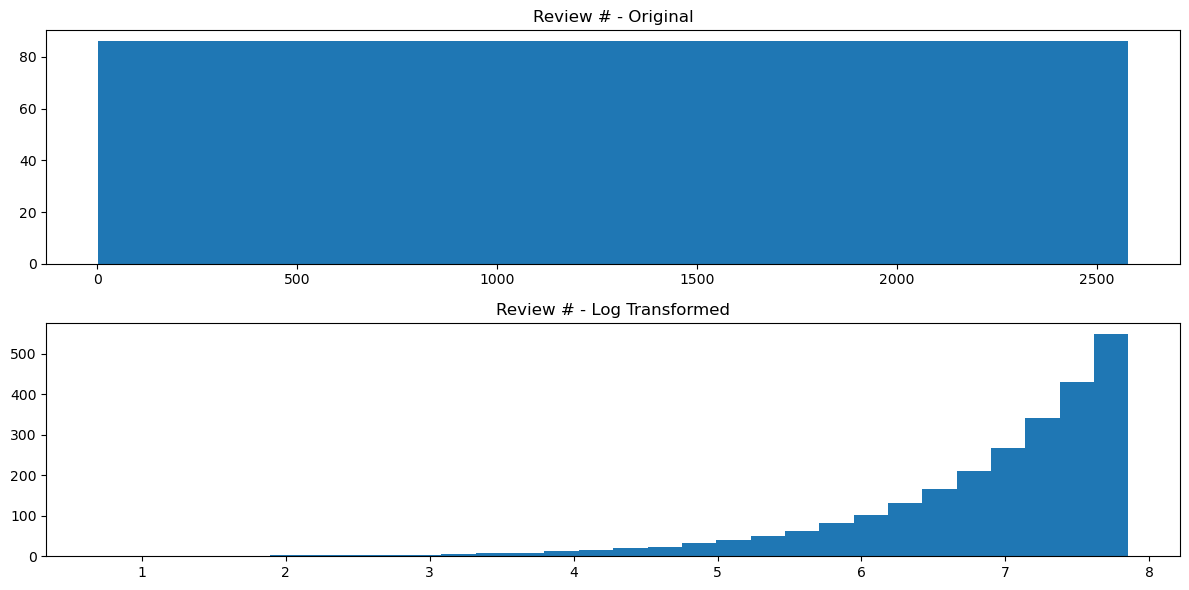

In [24]:
data_log_transformed = data[numeric_cols].apply(lambda x: np.log1p(x))

# Visualize the distributions before and after log transformation
plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols), i + 1)
    plt.hist(data[col], bins=30)
    plt.title(f'{col} - Original')
    plt.subplot(2, len(numeric_cols), i + len(numeric_cols) + 1)
    plt.hist(data_log_transformed[col], bins=30)
    plt.title(f'{col} - Log Transformed')

plt.tight_layout()
plt.show()

# Concatenate the transformed features with non-numeric columns
data_preprocessed = pd.concat([data.drop(numeric_cols, axis=1), data_scaled_minmax, data_scaled_standard, data_log_transformed], axis=1)

# Save the preprocessed dataset
data_preprocessed.to_csv('your_preprocessed_dataset.csv', index=False)

# Phase II

# Feature Engineering with Domain Knowledge
## Geographical Features

In [26]:
if 'country' in data.columns:
    # Step 1: One-Hot Encoding for 'country' feature
    one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
    country_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[['country']]), 
                                   columns=one_hot_encoder.get_feature_names_out(['country']))
    
    # Drop the original 'country' column and concatenate the encoded columns
    data_encoded = data.drop('country', axis=1)
    data_encoded = pd.concat([data_encoded, country_encoded], axis=1)
    
    # Step 2: Cluster-Based Features
    # Example: Group countries into clusters (e.g., using 5 clusters)
    kmeans = KMeans(n_clusters=5, random_state=42)
    country_clusters = kmeans.fit_predict(country_encoded)
    
    # Add the cluster information to the dataset
    data_encoded['country_cluster'] = country_clusters
    
    # Save the processed dataset
    data_encoded.to_csv('your_processed_dataset_with_geographical_features.csv', index=False)
else:
    print("Column 'country' not found in the dataset")

# Check the resulting dataset
print(data_encoded.head())

Column 'country' not found in the dataset
   Review #  Brand_7 Select  Brand_7 Select/Nissin  Brand_A-One  \
0    2580.0             0.0                    0.0          0.0   
1    2579.0             0.0                    0.0          0.0   
2    2578.0             0.0                    0.0          0.0   
3    2577.0             0.0                    0.0          0.0   
4    2576.0             0.0                    0.0          0.0   

   Brand_A-Sha Dry Noodle  Brand_A1  Brand_ABC  Brand_Acecook  Brand_Adabi  \
0                     0.0       0.0        0.0            0.0          0.0   
1                     0.0       0.0        0.0            0.0          0.0   
2                     0.0       0.0        0.0            0.0          0.0   
3                     0.0       0.0        0.0            0.0          0.0   
4                     0.0       0.0        0.0            0.0          0.0   

   Brand_Ah Lai  ...  Top_Ten_2015 #8  Top_Ten_2015 #9  Top_Ten_2016 #1  \
0          

In [44]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Selection


In [45]:
data = pd.read_csv('ramen-ratings.csv')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top_Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [47]:
df = pd.DataFrame({
    'Review #': np.random.rand(100),
    'Brand': np.random.rand(100),
    'Variety': np.random.rand(100),
    'Style': np.random.rand(100),
    'Country': np.random.rand(100),
    'Stars': np.random.randint(2, size=100)
})

In [48]:
X = df.drop('Stars', axis=1)
y = df['Stars']

In [49]:
# Variance Threshold
selector = VarianceThreshold(threshold=0.01)  
X_var_thresh = selector.fit_transform(X)

In [50]:
corr_matrix = pd.DataFrame(X_var_thresh).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]  # you can adjust the threshold
X_corr = pd.DataFrame(X_var_thresh).drop(columns=to_drop, axis=1)

In [51]:
X_new_chi2 = SelectKBest(chi2, k=5).fit_transform(X_corr, y)  
X_new_anova = SelectKBest(f_classif, k=5).fit_transform(X_corr, y)  
X_new_mi = SelectKBest(mutual_info_classif, k=5).fit_transform(X_corr, y) 

In [52]:
X_new_combined = np.hstack((X_new_chi2, X_new_anova, X_new_mi))
X_new_combined = pd.DataFrame(X_new_combined)

## REGULARIZATION

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new_combined)

In [54]:
#LASSOCV
lasso = LassoCV(cv=5).fit(X_scaled, y)
model = SelectFromModel(lasso, prefit=True)
X_lasso_selected = model.transform(X_scaled)

In [55]:
# RidgeCV
ridge = RidgeCV(cv=5).fit(X_scaled, y)
model = SelectFromModel(ridge, prefit=True)
X_ridge_selected = model.transform(X_scaled)

# Final feature set
X_final = pd.DataFrame(X_lasso_selected)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)# RidgeCV
ridge = RidgeCV(cv=5).fit(X_scaled, y)
model = SelectFromModel(ridge, prefit=True)
X_ridge_selected = model.transform(X_scaled)

# Final feature set
X_final = pd.DataFrame(X_lasso_selected)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Cross Validation

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
X_final = pd.DataFrame(X_lasso_selected)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Cross-Validation: Evaluate stability and performance
clf = RandomForestClassifier(random_state=42)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Average Cross-Validation Score: {np.mean(cross_val_scores):.2f}')

Cross-Validation Scores: [0.5625 0.4375 0.5625 0.5625 0.625 ]
Average Cross-Validation Score: 0.55


# Hyper Parameter Tunning

In [74]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.43      0.30      0.35        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.44        20
weighted avg       0.45      0.45      0.44        20

Confusion Matrix:
[[6 4]
 [7 3]]
Feature Importances:
   Feature  Importance
3        3    0.221837
4        4    0.217030
1        1    0.212100
2        2    0.181278
0        0    0.167754


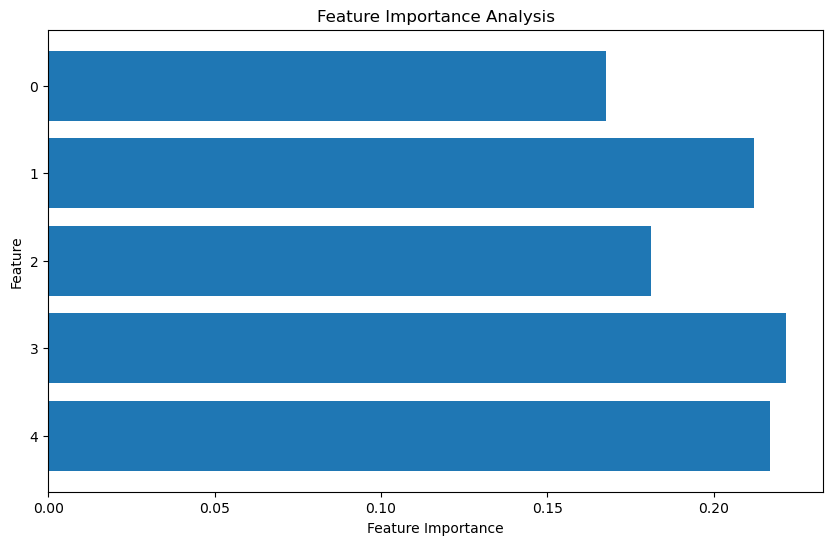

In [76]:
best_clf.fit(X_train, y_train)

# Make predictions
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Feature Importance Analysis
feature_importances = best_clf.feature_importances_
features = X_final.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print('Feature Importances:')
print(importance_df)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()
plt.show()